<a href="https://colab.research.google.com/github/NicoleBahamonMartinez/Parcial-2-Ciencia-de-Datos-/blob/main/MINE4101_Parcial2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Parcial 2 - Ciencia de Datos Aplicada**
# **2022** **-** **II**
## Nicole Bahamón Martínez
## 201629594

**Objetivo del modelo:** Predecir si una paciente mujer padece de diabetes a partir de ciertas features físicas e historial familiar. 

**Diccionario de datos:**
pregnancies: indicates the number of pregnancies

glucose: indicates the plasma glucose concentration

blood_pressure: indicates diastolic blood pressure in mm/Hg

skin_thickness: indicates triceps skinfold thickness in mm

insulin: indicates insulin in U/mL

bmi: indicates the body mass index in kg/m2

diabetes_pedigree_fn: indicates the function which scores likelihood of diabetes based on family history

age: indicates the age of the women

diabetes: indicates if the patient had diabetes or not (1 = yes, 0 = no)

**Problema**: Clasificación binaria de condición diabética


In [2]:
!pip install shap

# Carga de librerias necesarias

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score
from joblib import load
import shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 575 kB 4.8 MB/s 


In [116]:
# Lectura de datos
df = pd.read_csv('/content/diabetes_test.csv', sep = ',', decimal = '.')

In [91]:
# Visualización de datos
## Se puede ver que todos los datos númericos
df.head()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_fn,age,diabetes
0,5,88,78,30,0,27.6,0.258,37,0
1,3,61,82,28,0,34.4,0.243,46,0
2,8,183,64,0,0,23.3,0.672,32,1
3,6,80,80,36,0,39.8,0.177,28,0
4,8,108,70,0,0,30.5,0.955,33,1


In [92]:
# Descripción del dataframe
df.shape


(154, 9)

In [93]:
df.describe()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_fn,age,diabetes
count,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000
mean,3.792208,119.357143,69.610390,21.214286,77.103896,32.127273,0.453662,32.902597,0.350649
std,3.336617,34.967525,16.405926,14.994537,103.252921,8.025085,0.290488,11.827060,0.478730
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.096000,21.000000,0.000000
25%,1.000000,96.000000,64.000000,1.750000,0.000000,27.750000,0.235500,24.000000,0.000000
50%,3.000000,113.000000,72.000000,24.000000,39.500000,32.400000,0.376500,28.500000,0.000000
75%,6.000000,140.750000,80.000000,33.000000,125.000000,35.975000,0.619750,39.750000,1.000000
max,17.000000,196.000000,102.000000,54.000000,540.000000,55.000000,1.731000,69.000000,1.000000


In [10]:
df.dtypes

pregnancies               int64
glucose                   int64
blood_pressure            int64
skin_thickness            int64
insulin                   int64
bmi                     float64
diabetes_pedigree_fn    float64
age                       int64
diabetes                  int64
dtype: object

In [114]:
# Carga del modelo
modelo = load('/content/diabetes-v1.0.joblib')
modelo

RandomForestClassifier(criterion='entropy', max_depth=4, max_features='log2',
                       n_estimators=50, random_state=60)

In [117]:
Y = df['diabetes']
X = df
del X['diabetes']

In [118]:
results = modelo.predict(X)

In [119]:
np.sum(results)

39

## Pregunta 1:
Utilizando el modelo y el dataset de test proporcionado, calcule la tasa de verdaderos positivos.

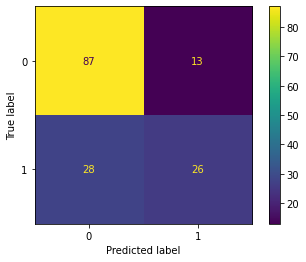

In [21]:
# Plotting confusion matrix
ConfusionMatrixDisplay.from_predictions(Y, results)

Se toma como categoria positiva cuando el paciente tiene diabetes. La tasa de verdaderos positivos es entonces cuando el modelo dice que el paciente tiene diabetes y el paciente en realidad tiene diabetes. Se tiene entonces que la tasa de verdaderos positivos  es de 26

## Pregunta 2

Si el usuario del modelo, un médico tratante de casos de diabetes, desea reducir el riesgo de predecir como positivos para diabetes a los pacientes que realmente no tienen la enfermedad, ¿cuál métrica de clasificación debe priorizar? ¿precision o recall? ¿cambia la decisión del médico si desea utilizar un threshold de 0.75 con el fin de realizar las predicciones con un mayor nivel de confianza?

El médico debe priorizar la métrica de precisión la cual antepone la busqueda de casos verdaderamente positivos a encontrar la mayor cantidad de casos positivos correctamente (recall). La precisión estaría midiendo la calidad del modelo de clasificar correctamente los registros.
Al aumentar el threshold se esperaría que el modelo clasifique de manera positiva únicamente a los que esta 75% seguro. Aunque esto ayudaría a reducir reducir el riesgo de predecir como positivos para diabetes a los pacientes que realmente no tienen la enfermedad la decisión sigue siendo la misma de priorizar la metrica de precisión. Con este threshold y priorizando la precisión habrá más seguridad de obtener una clasificación correcta.

## Pregunta 3 
De acuerdo al modelo proporcionado, ¿cuales son las tres features más importantes para determinar un caso positivo de diabetes? ¿Cómo afecta el valor de las features a la estimación de la probabilidad de padecer la enfermedad?

In [22]:
explainer = shap.TreeExplainer(modelo)
shap_values = explainer.shap_values(X)

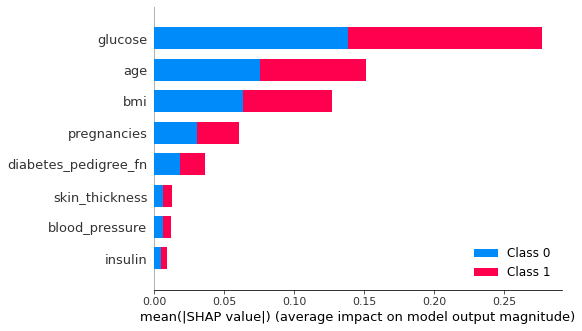

In [23]:
shap.summary_plot(shap_values, X, plot_type="bar")

Las features más importantes del modelo son:
- Glucosa
- Edad
- Body Mass Index

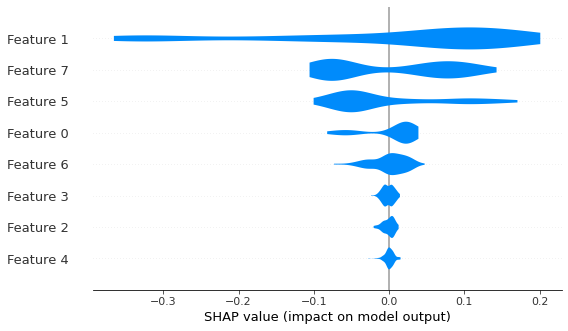

In [25]:
shap.summary_plot(shap_values[0], plot_type = 'violin')

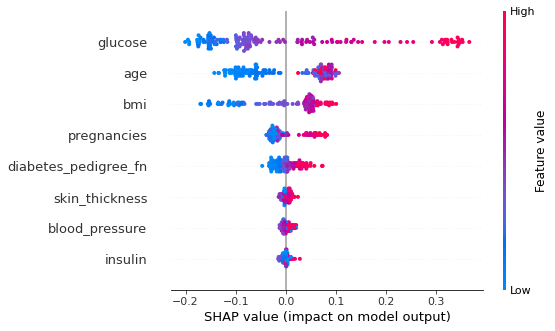

In [30]:
shap.summary_plot(shap_values[1], X.astype("float"))

Se encuentra que entre más altos sean los valores de las características más probabilidades hay de padecer diabetes

## Pregunta 4
Un paciente descrito con los valores de features siguientes, fue diagnosticado por el modelo como negativo para diabetes. A partir de las estimaciones que realizaría el mismo modelo en el futuro, ¿a qué edad el paciente sería diagnosticado como positivo para diabetes con una probabilidad de más de 65%? Suponga que los demás valores de features permanecen constantes.

pregnancies: 2

glucose: 175

blood_pressure: 88

skin_thickness: 0

insulin: 0

bmi: 22.9

diabetes_pedigree_fn: 0.326

age: 22

In [31]:
X.head()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_fn,age
0,5,88,78,30,0,27.6,0.258,37
1,3,61,82,28,0,34.4,0.243,46
2,8,183,64,0,0,23.3,0.672,32
3,6,80,80,36,0,39.8,0.177,28
4,8,108,70,0,0,30.5,0.955,33


In [108]:
Xi = X
threshold = 0.65

for i in range(22,101):
  Xi=Xi.append({'pregnancies':2,'glucose':175,'blood_pressure':88,'skin_thickness':0,'insulin':0,'bmi':22.9,'diabetes_pedigree_fn':0.326,'age':i},ignore_index=True)
  predicted_proba = modelo.predict_proba(Xi.tail(1))
  Ri = (predicted_proba [:,1] >= threshold).astype('int')
  if Ri[0] == 1:
    print('La edad en la que el paciente va a tener diabetes es:'+str(i))
    break


La edad en la que el paciente va a tener diabetes es:60


In [112]:
np.sum(results)

39

## Pregunta 5
(Caso hipotético) Si bien para el médico especialista en diabetes puede ser más útil un modelo que le permita identificar la mayor cantidad posible de pacientes que realmente padecen la enfermedad, aún cuando se seleccionen algunos casos de diabetes de forma errada; el administrador del hospital ha determinado que se cuentan con los recursos para tratar solamente a un máximo de 20 pacientes de los existentes en la actual base de datos.

A partir de este escenario, responda las preguntas:

¿Cuál debe ser el nuevo valor del threshold (diferente a 0.5) para tomar la decisión con la mayor probabilidad posible de los pacientes que en efecto si padecen de diabetes sin que se supere la capacidad máxima del hospital?
¿Cómo quedaría la matriz de confusión distribuida para el cambio de threshold propuesto?

0.6100000000000001


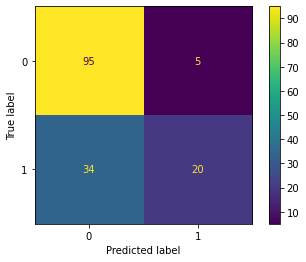

In [126]:
for i in np.arange(0.5, 1.0, 0.01):
  predicted_proba = modelo.predict_proba(X)
  results = (predicted_proba [:,1] >= i).astype('int')
  conf_mat=confusion_matrix(Y, results)
  TP = np.diag(conf_mat)
  if TP[1] <= 20:
    ConfusionMatrixDisplay.from_predictions(Y, results)
    print(i)
    break
